In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import datetime as dt

from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
hub_nash=pd.read_csv('../data/hubNashville__311__Service_Requests.csv')

/opt/anaconda3/envs/geo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
hub_nash.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,354524,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 09:46:53 PM,04/28/2020 09:46:53 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,354188,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 05:09:02 PM,04/28/2020 05:09:02 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,354445,Closed,Quick Requests,Quick Requests,NaN,04/28/2020 08:50:36 PM,04/28/2020 08:50:36 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,334893,Closed,Public Safety,Control Number Request for Towing,NaN,03/29/2020 01:08:55 AM,03/29/2020 01:08:55 AM,hubNashville Community,NaN,NaN,...,False,NaN,True,Long Hollow Pike & Northcreek Blvd,GOODLETTSVILLE,10.0,37072,36.32619,-86.700618,"(36.32619, -86.70061799999999)"


Question 2 - Online vs phone by council district, could reveal differences in access?

In [4]:
hub_nash['Request Origin'].unique()

array(['hubNashville Community', 'Phone', 'Mobile App', "Mayor's Office",
       "Council's Website", 'In Person at Event', 'Email',
       'Council Member', "Mayor's Website", 'OEM Case', 'Walk-In',
       'Social Media', 'USPS Letter'], dtype=object)

In [5]:
hub_nash['Request Origin'].value_counts()

Phone                     244656
hubNashville Community     88649
Mobile App                 13051
Email                       1721
Mayor's Office               372
Council Member               129
Council's Website             50
Walk-In                       18
Mayor's Website                8
In Person at Event             6
Social Media                   5
USPS Letter                    5
OEM Case                       1
Name: Request Origin, dtype: int64

Group request origin to online(hubNashville Community, Moblie App, Email, & Social Media), phone, and other

In [6]:
online_methods = ['hubNashville Community','Mobile App','Email','Social Media']
online_request_method = hub_nash[hub_nash['Request Origin'].isin(online_methods)]
online_request_method.shape

(103426, 21)

In [7]:
online = online_request_method['Council District'].value_counts()

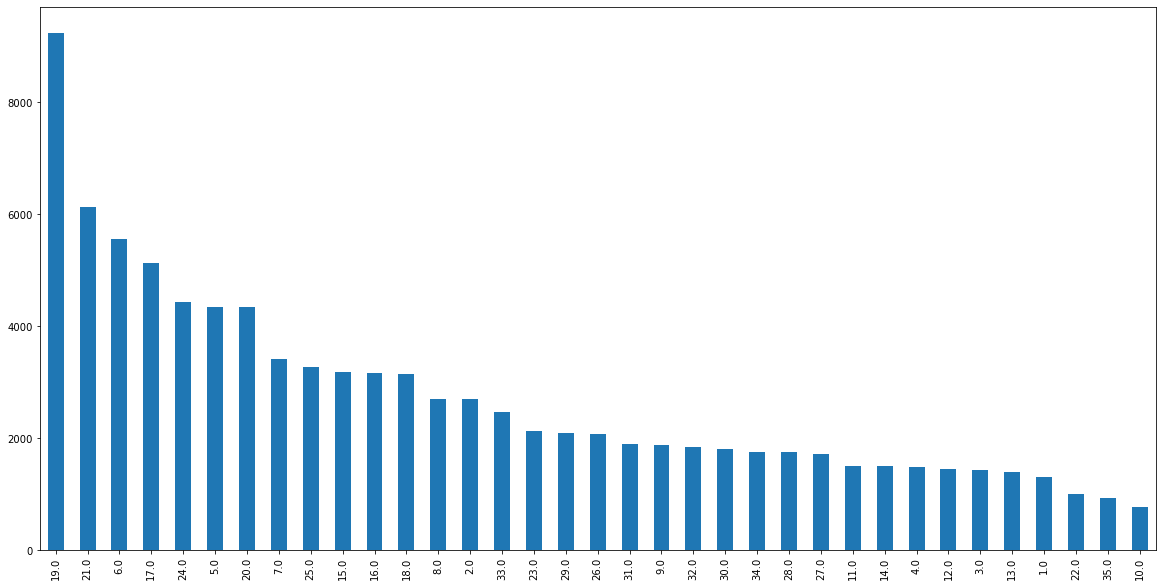

In [8]:
online.plot(kind="bar", figsize=(20,10))

In [9]:
online_request_method['City'].value_counts()  #should clean city data to aggregate/group and fix errors

NASHVILLE          76768
ANTIOCH             7759
MADISON             4301
HERMITAGE           2533
OLD HICKORY         1151
BRENTWOOD           1009
GOODLETTSVILLE       588
WHITES CREEK         323
JOELTON              256
Nashville            108
ASHLAND CITY          86
NOLENSVILLE           69
NASHVILLE, TN         43
PEGRAM                33
LA VERGNE             28
MOUNT JULIET          22
LAVERGNE              21
Antioch                9
FRANKLIN               7
ANTIOCH, TN            5
Hermitage              4
Nashville, TN          3
Madison                2
NASHVILLE,TN           2
BELLEVUE               2
Nashvillle             2
Antioch, TN            2
HERMITAGE, TN          2
Nashville TN           1
Goodlettsville         1
Whites Creek           1
Nashvile, TN           1
Nashville,TN           1
Hermitage, TN          1
Mt. Juliet             1
nashville              1
Old Hickory            1
UNKNOWN                1
OLD HICKORY, TN        1
Name: City, dtype: int64

In [10]:
#group phone request 
phone_request_method = hub_nash.loc[(hub_nash['Request Origin'] == "Phone")]
phone_request_method.shape

(244656, 21)

In [11]:
phone = phone_request_method['Council District'].value_counts()

In [12]:
phone_request_method['ZIP'].value_counts()

37013.0    13965
37211.0    12925
37209.0    11189
37207.0    10836
37206.0     9979
           ...  
37152.0        2
37075.0        1
38011          1
37232.0        1
0.0            1
Name: ZIP, Length: 78, dtype: int64

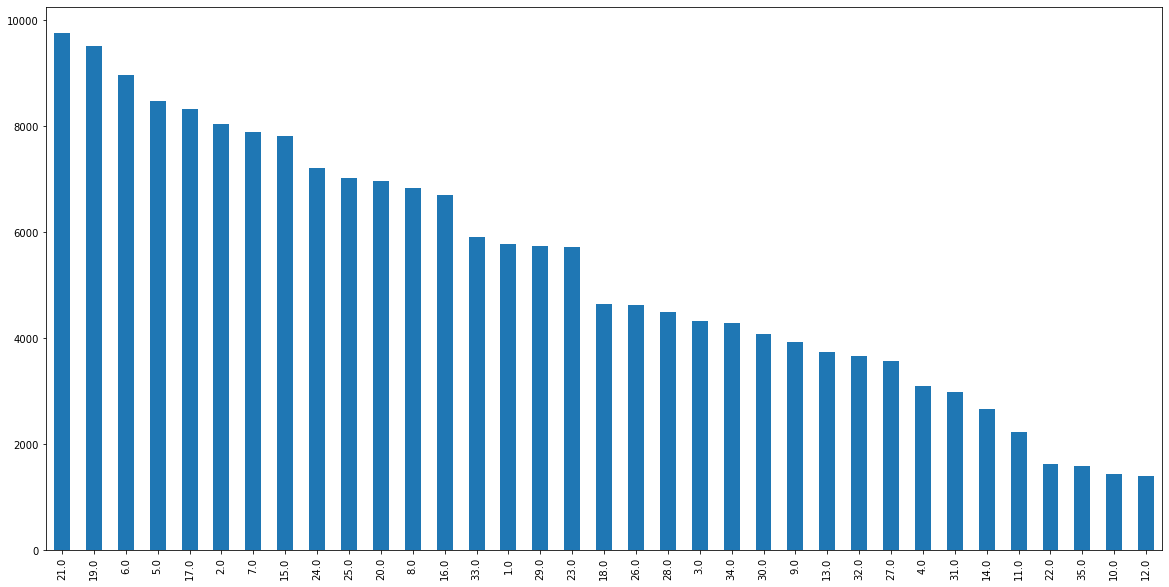

In [13]:
phone.plot(kind="bar", figsize=(20,10))

In [14]:
phone_request_method['City'].value_counts().head()

NASHVILLE    147044
ANTIOCH       17844
MADISON        9705
HERMITAGE      3039
BRENTWOOD      2436
Name: City, dtype: int64

In [15]:
#all other request orgins besides phone and web
other_methods = ["Mayor's Office",'Council Member',"Council's Website",'Walk-In', "Mayor's Website", 'In Person at Event','USPS Letter','Social Media', 'OEM Case']
other_request_method = hub_nash[hub_nash['Request Origin'].isin(other_methods)]
other_request_method.shape

(594, 21)

In [16]:
other_request_method['Council District'].value_counts()

21.0    28
9.0     24
5.0     22
8.0     22
19.0    21
24.0    20
7.0     20
1.0     19
33.0    18
16.0    18
6.0     13
29.0    13
31.0    13
2.0     13
25.0    11
34.0    11
3.0     10
23.0     9
20.0     9
17.0     8
28.0     8
27.0     8
4.0      8
15.0     8
30.0     5
14.0     5
18.0     5
22.0     4
32.0     4
12.0     4
13.0     4
11.0     2
26.0     2
35.0     2
10.0     1
Name: Council District, dtype: int64

In [17]:
other_request_method['ZIP'].value_counts().head(10) 
#need to clean some zip codes for no decimals and trailing 0 to aggregate these better

37115.0    35
37013.0    29
37211.0    27
37205.0    25
37208.0    24
37207.0    22
37209.0    18
37013      18
37115      17
37206.0    16
Name: ZIP, dtype: int64

In [18]:
other_request_method['City'].value_counts().head()

NASHVILLE    267
ANTIOCH       42
MADISON       39
Nashville     18
Madison       17
Name: City, dtype: int64

In [19]:
prop_nash = pd.read_csv('../data/Property_Standards_Violations.csv')

In [20]:
prop_nash.head()

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location
0,18-1173493,01/08/2018,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,Codes Online,"Man living in out building, Dug hole for waste...",OPEN,NaN,NaN,NaN,NaN,NaN,NaN
1,17-1161368,07/05/2017,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,EMAIL,High grass/weeds,OPEN,NaN,NaN,NaN,NaN,NaN,NaN
2,18-1182182,05/30/2018,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,PHONE,tall grass,OPEN,NaN,NaN,NaN,NaN,NaN,NaN
3,18-1187679,08/20/2018,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,PHONE,PROBLEM REPORTED,OPEN,NaN,NaN,NaN,NaN,NaN,NaN
4,17-1167143,09/15/2017,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,grass,OPEN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
prop_nash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70476 entries, 0 to 70475
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Request #             70476 non-null  object 
 1   Date Received         70476 non-null  object 
 2   Property APN          70143 non-null  object 
 3   Property Address      70143 non-null  object 
 4   City                  70138 non-null  object 
 5   State                 70143 non-null  object 
 6   ZIP                   70138 non-null  float64
 7   Property Owner        70476 non-null  object 
 8   Complaint Source      70476 non-null  object 
 9   Reported Problem      70173 non-null  object 
 10  Status                70476 non-null  object 
 11  Council District      70121 non-null  float64
 12  Last Activity Date    70183 non-null  object 
 13  Last Activity         70183 non-null  object 
 14  Last Activity Result  70177 non-null  object 
 15  Violations Noted   

In [22]:
prop_complaint = prop_nash['Complaint Source'].value_counts()
prop_complaint

INSPECTOR REPORTED                     28146
HUB                                    15786
PHONE                                  12684
Codes Online                            4464
EMAIL                                   4200
Audit                                   2924
OTHER SOURCE                             533
SPE                                      499
NEIGHBORHOOD NOTIFICATION                477
WALK IN                                  227
Metro Council                            158
Metro PD                                  99
Other Metro Agency                        81
NEIGHBORHOOD GROUP                        65
MAIL                                      62
Metro Public Works                        41
CAL                                       18
COMMUNITY MATTERS                          7
INCIDENTS CONVERTED FROM OLD SYSTEM        3
RENT INSPECTION AUDIT                      2
Name: Complaint Source, dtype: int64

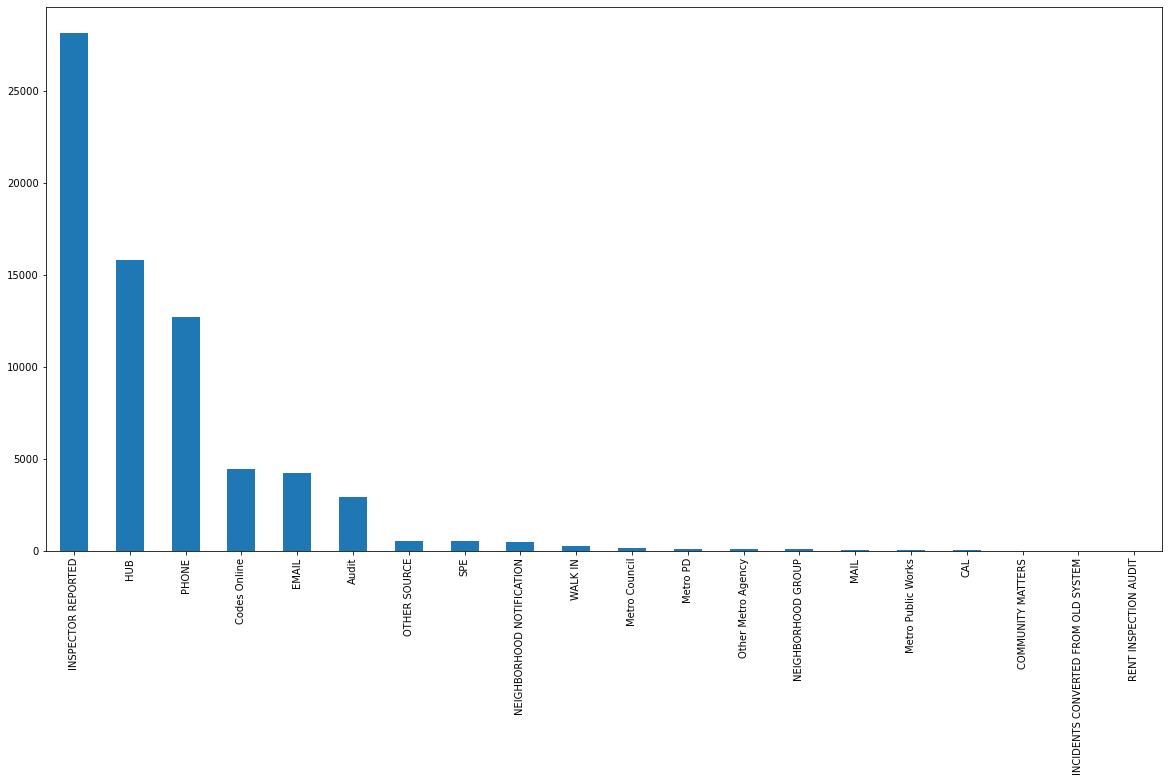

In [23]:
prop_complaint.plot(kind="bar", figsize=(20,10))

In [24]:
prop_nash['Last Activity Date'] =  pd.to_datetime(prop_nash['Last Activity Date'])
prop_nash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70476 entries, 0 to 70475
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Request #             70476 non-null  object        
 1   Date Received         70476 non-null  object        
 2   Property APN          70143 non-null  object        
 3   Property Address      70143 non-null  object        
 4   City                  70138 non-null  object        
 5   State                 70143 non-null  object        
 6   ZIP                   70138 non-null  float64       
 7   Property Owner        70476 non-null  object        
 8   Complaint Source      70476 non-null  object        
 9   Reported Problem      70173 non-null  object        
 10  Status                70476 non-null  object        
 11  Council District      70121 non-null  float64       
 12  Last Activity Date    70183 non-null  datetime64[ns]
 13  Last Activity   

In [25]:
prop_nash['Date Received'] =  pd.to_datetime(prop_nash['Date Received'])
prop_nash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70476 entries, 0 to 70475
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Request #             70476 non-null  object        
 1   Date Received         70476 non-null  datetime64[ns]
 2   Property APN          70143 non-null  object        
 3   Property Address      70143 non-null  object        
 4   City                  70138 non-null  object        
 5   State                 70143 non-null  object        
 6   ZIP                   70138 non-null  float64       
 7   Property Owner        70476 non-null  object        
 8   Complaint Source      70476 non-null  object        
 9   Reported Problem      70173 non-null  object        
 10  Status                70476 non-null  object        
 11  Council District      70121 non-null  float64       
 12  Last Activity Date    70183 non-null  datetime64[ns]
 13  Last Activity   

In [26]:
prop_nash.tail()

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location
70471,19-1202308,2019-05-02,11902006400,215 GARWOOD DR,NASHVILLE,TN,37210.0,"MYLES, TAMMIE SUE",INSPECTOR REPORTED,"imv, jtd",DONE,16.0,2019-06-27,Violation Inspection - PS,Violation Resolved,"OPEN STORAGE, JUNK, TRASH, DEBRIS,UNLIC / INOP...","215 GARWOOD DR\nNASHVILLE, TN 37210\n(36.12394..."
70472,18-1188195,2018-08-28,08216023600,626 FATHERLAND ST,NASHVILLE,TN,37206.0,"BAUERSCHMIDT, JOHN CRAWFORD & CAROLINE PEARCE",Codes Online,High grass at alley,DONE,6.0,2018-11-19,Env Court 1st Setting - PS,PS - Dismissal with Just Cost,HIGH WEEDS,"626 FATHERLAND ST\nNASHVILLE, TN 37206\n(36.17..."
70473,17-1168931,2017-10-10,10816000900,1030 PLEASANT VIEW DR,NASHVILLE,TN,37214.0,"LEE, YOON",INSPECTOR REPORTED,High Grass,DONE,13.0,2017-10-20,Violation Inspection - PS,Violation Resolved,HIGH WEEDS,"1030 PLEASANT VIEW DR\nNASHVILLE, TN 37214\n(3..."
70474,18-1178600,2018-04-16,13413005000,288 SPARTAN DR,NASHVILLE,TN,37211.0,"HOWSE, JANE E. EVANS- & JAMES W.",INSPECTOR REPORTED,inoperable vehicle,DONE,26.0,2018-06-01,Violation Inspection - PS,Violation Resolved,UNLIC / INOP / ACCUMULATION MTR VEHICLES,"288 SPARTAN DR\nNASHVILLE, TN 37211\n(36.08456..."
70475,19-1198042,2019-02-25,03413005400,109 EDGEMEADE BLVD,MADISON,TN,37115.0,"UNION REAL ESTATE INVESTMENT, INC",HUB,Type: Property Violations - Junk and Debris\n\...,DONE,10.0,2019-03-18,Violation Inspection - PS,Violation Resolved,"OPEN STORAGE, JUNK, TRASH, DEBRIS","109 EDGEMEADE BLVD\nMADISON, TN 37115\n(36.283..."


In [27]:
prop_nash['year'] = pd.DatetimeIndex(prop_nash['Date Received']).year
prop_nash.head()

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location,year
0,18-1173493,2018-01-08,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,Codes Online,"Man living in out building, Dug hole for waste...",OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2018
1,17-1161368,2017-07-05,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,EMAIL,High grass/weeds,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2017
2,18-1182182,2018-05-30,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,PHONE,tall grass,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2018
3,18-1187679,2018-08-20,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,PHONE,PROBLEM REPORTED,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2018
4,17-1167143,2017-09-15,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,grass,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2017


In [28]:
prop_nash['month_year'] = pd.to_datetime(prop_nash['Date Received']).dt.to_period('M')
prop_nash.head()

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location,year,month_year
0,18-1173493,2018-01-08,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,Codes Online,"Man living in out building, Dug hole for waste...",OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2018,2018-01
1,17-1161368,2017-07-05,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,EMAIL,High grass/weeds,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2017,2017-07
2,18-1182182,2018-05-30,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,PHONE,tall grass,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2018,2018-05
3,18-1187679,2018-08-20,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,PHONE,PROBLEM REPORTED,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2018,2018-08
4,17-1167143,2017-09-15,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,grass,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2017,2017-09


In [32]:
# graph with complaint source (Inspector Reported, Hub, Phone) by month
#grouped barchart I think?

#Styling:
#Hub yellow color: #ffdd85
#Hub blue color: #2e3a90
#Font: Lato,

In [50]:
bars1 = prop_nash[prop_nash['Complaint Source'] == 'INSPECTOR REPORTED']

In [51]:
bars1

,Request #,Date Received,Property APN,Property Address,City,State,ZIP,Property Owner,Complaint Source,Reported Problem,Status,Council District,Last Activity Date,Last Activity,Last Activity Result,Violations Noted,Mapped Location,year,month_year
4,17-1167143,2017-09-15,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,grass,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2017,2017-09
7,17-1163527,2017-07-31,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,NO VIOLATION FOUND,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2017,2017-07
9,19-1198027,2019-02-25,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,MADISON AUDIT-IMV,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2019,2019-02
12,17-1164026,2017-08-03,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,IMV/PARKING/DEBRIS,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2017,2017-08
13,17-1164025,2017-08-03,NaN,NaN,NaN,NaN,NaN,OWNER INFO UNAVAILABLE,INSPECTOR REPORTED,IMV/PKING/DEBRIS AT ALLEY,OPEN,NaN,NaT,NaN,NaN,NaN,NaN,2017,2017-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70468,17-1163980,2017-08-03,06110015300,901 VIRGINIA AVE,NASHVILLE,TN,37216.0,"M SQUARED, LLC",INSPECTOR REPORTED,HIGH GRASS AND WEEDS ALL WAY TO THE STREET,DONE,8.0,2017-08-22,Violation Inspection - PS,Violation Resolved,HIGH WEEDS,"901 VIRGINIA AVE\nNASHVILLE, TN 37216\n(36.222...",2017,2017-08
70469,17-1165655,2017-08-22,05015017300,3266 VAILVIEW DR,NASHVILLE,TN,37207.0,"MCGEE, HATTIE J. & DEWAYNE",INSPECTOR REPORTED,HIGH GRASS/WEEDS,DONE,3.0,2017-09-11,Violation Inspection - PS,Violation Resolved,HIGH WEEDS,"3266 VAILVIEW DR\nNASHVILLE, TN 37207\n(36.239...",2017,2017-08
70471,19-1202308,2019-05-02,11902006400,215 GARWOOD DR,NASHVILLE,TN,37210.0,"MYLES, TAMMIE SUE",INSPECTOR REPORTED,"imv, jtd",DONE,16.0,2019-06-27,Violation Inspection - PS,Violation Resolved,"OPEN STORAGE, JUNK, TRASH, DEBRIS,UNLIC / INOP...","215 GARWOOD DR\nNASHVILLE, TN 37210\n(36.12394...",2019,2019-05
70473,17-1168931,2017-10-10,10816000900,1030 PLEASANT VIEW DR,NASHVILLE,TN,37214.0,"LEE, YOON",INSPECTOR REPORTED,High Grass,DONE,13.0,2017-10-20,Violation Inspection - PS,Violation Resolved,HIGH WEEDS,"1030 PLEASANT VIEW DR\nNASHVILLE, TN 37214\n(3...",2017,2017-10


In [55]:
bars1 = bars1.groupby('month_year').count()['Complaint Source'].reset_index()

In [56]:
bars1['complaint_type'] = 'inspector'

In [57]:
bars1.head()

,month_year,Complaint Source,complaint_type
0,2017-05,469,inspector
1,2017-06,992,inspector
2,2017-07,1080,inspector
3,2017-08,1244,inspector
4,2017-09,940,inspector


In [58]:
bars2 = prop_nash[prop_nash['Complaint Source'] == 'HUB']
bars2 = bars2.groupby('month_year').count()['Complaint Source'].reset_index()

In [59]:
bars3 = prop_nash[prop_nash['Complaint Source'] == 'PHONE']
bars3 = bars3.groupby('month_year').count()['Complaint Source'].reset_index()

In [60]:
bars2['complaint_type'] = 'hub'
bars3['complaint_type'] = 'phone'

In [64]:
bars = pd.concat([bars1, bars2, bars3])
bars.tail()
bars.complaint_type.value_counts()

phone        37
inspector    37
hub          30
Name: complaint_type, dtype: int64

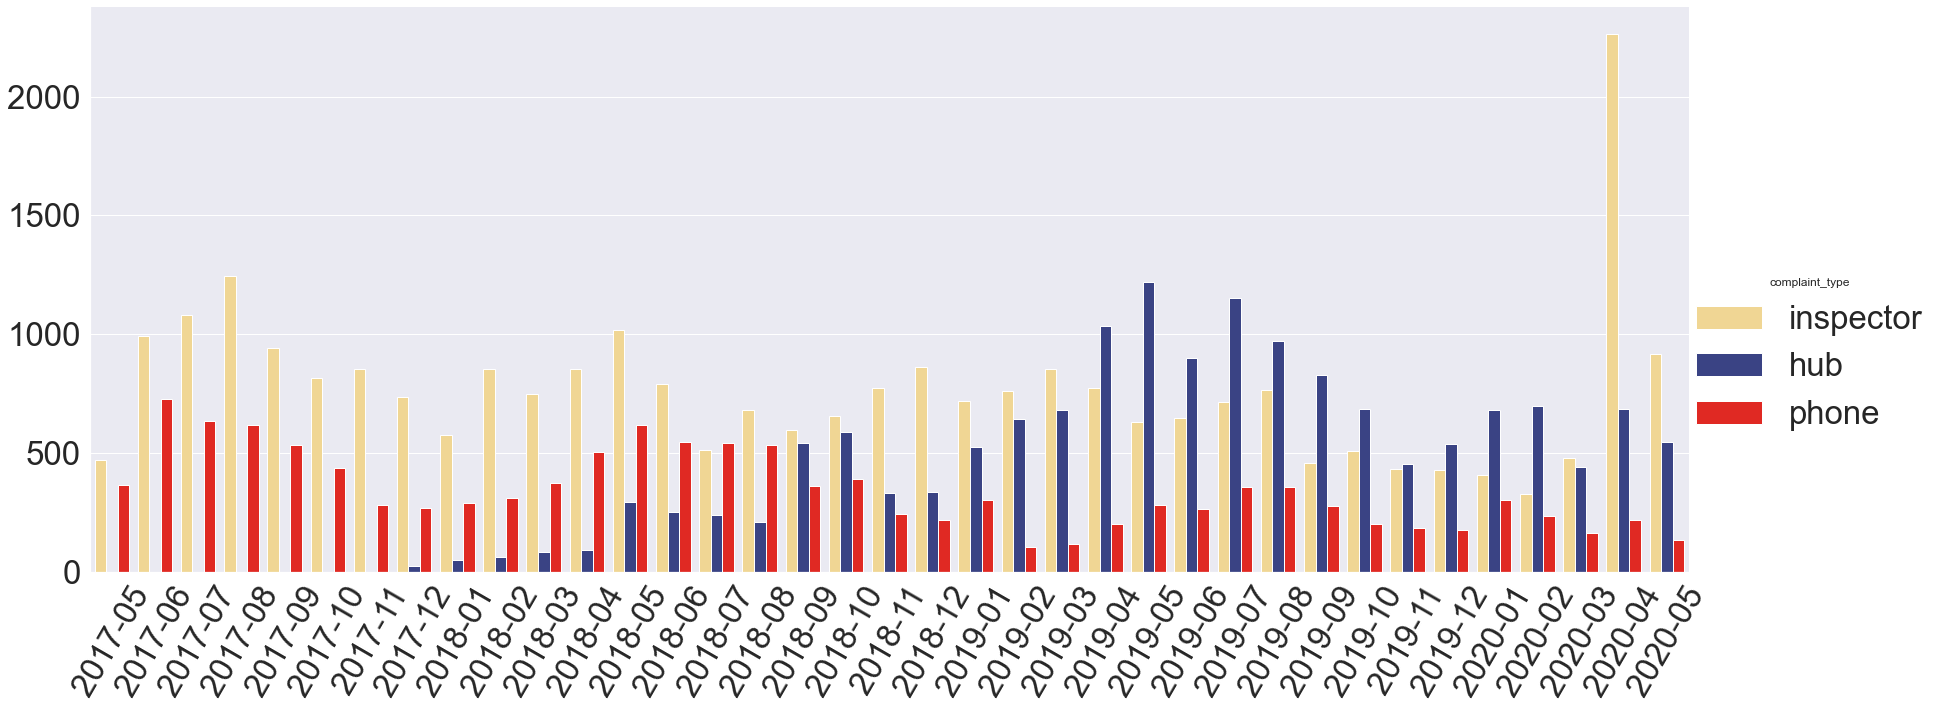

In [90]:
sns.set(font_scale = 3)

colors = ["#FFDD85", "#2E3A90", "#FF0B04"] #needed to specify 3rd color, replace with Cristina-preferred

custom_palette = sns.set_palette(sns.color_palette(colors))

g = sns.catplot(x="month_year", y="Complaint Source", hue="complaint_type", data=bars,
                height=10, aspect=2.5, kind="bar", palette=custom_palette)

g.set(xlabel=None, ylabel=None)

plt.xticks(rotation = 60)

#getting attribute error 'FacetGrid' object has no attribute 'set_title'
#g.set_title("Reporting Paths for Property Standards Violations", fontname = 'Lato', fontsize=18)

g.savefig("codes_inspector.png");
